In [52]:
# Import libraries and dependencies
import pandas as pd
import numpy as np
from pathlib import Path
%matplotlib inline
import os
import btalib
import ta


import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.style.use('seaborn')

import ta
from datetime import datetime, timedelta
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from nltk.sentiment.vader import SentimentIntensityAnalyzer

import warnings
warnings.filterwarnings('ignore')

In [53]:
# Load .env enviroment variables
load_dotenv()

# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")
api = tradeapi.REST(alpaca_api_key, alpaca_secret_key, api_version='v2')

In [54]:
# Set the ticker
ticker = "TSLA"

# Set timeframe to '1D'
timeframe = "1D"

# Set current date and the date from one month ago using the ISO format
current_date = pd.Timestamp("2020-10-5", tz="America/New_York").isoformat()
past_date = pd.Timestamp("2010-06-29", tz="America/New_York").isoformat()

# Get 4 weeks worth of historical data for AAPL
df = api.get_barset(
    ticker,
    timeframe,
    limit=None,
    start=past_date,
    end=current_date,
    after=None,
    until=None,
).df

#df = ta.utils.dropna(df)
# Display data
df.tail()

TSLA                                    
                             open    high     low     close    volume
time                                                                 
2020-09-29 00:00:00-04:00  416.00  428.50  411.60  418.9900  47891547
2020-09-30 00:00:00-04:00  421.32  433.93  420.47  428.9700  45355318
2020-10-01 00:00:00-04:00  440.76  448.88  434.42  447.8100  46783928
2020-10-02 00:00:00-04:00  421.39  439.13  415.00  415.2699  63810817
2020-10-05 00:00:00-04:00  423.35  433.64  419.33  425.5000  42042374

In [55]:
# Drop Outer Table Level
df = df.droplevel(axis=1, level=0)

# Use the drop function to drop extra columns
#df = df.drop(columns=["open", "high", "low", "volume"])

# Since this is daily data, we can keep only the date (remove the time) component of the data
df.index = df.index.date

# Display sample data
df.head()

,open,high,low,close,volume
2010-06-29,19.00,25.0000,17.54,23.94,18586286
2010-06-30,25.88,30.4192,23.30,23.63,16740222
2010-07-01,25.00,25.9200,20.27,21.90,8045449
2010-07-02,23.00,23.1000,18.71,19.20,4977765
2010-07-06,20.00,20.0000,15.83,15.98,6640566


In [56]:
# Add all ta features filling nans values
df = ta.add_all_ta_features(df, "open", "high", "low", "close", "volume", fillna=True)

In [57]:
df.shape

(2586, 77)

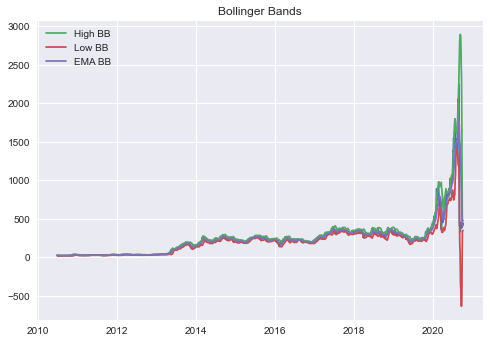

In [72]:
#
plt.plot(df[0:3000].close)
plt.plot(df[0:3000].volatility_bbh, label='High BB')
plt.plot(df[0:3000].volatility_bbl, label='Low BB')
plt.plot(df[0:3000].volatility_bbm, label='EMA BB')
plt.title('Bollinger Bands')
plt.legend()
plt.show()

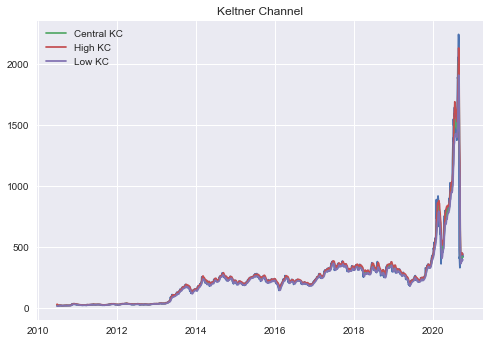

In [65]:
plt.plot(df[0: 3000].close)
plt.plot(df[0: 3000].volatility_kcc, label='Central KC')
plt.plot(df[0: 3000].volatility_kch, label='High KC')
plt.plot(df[0: 3000].volatility_kcl, label='Low KC')
plt.title('Keltner Channel')
plt.legend()
plt.show()

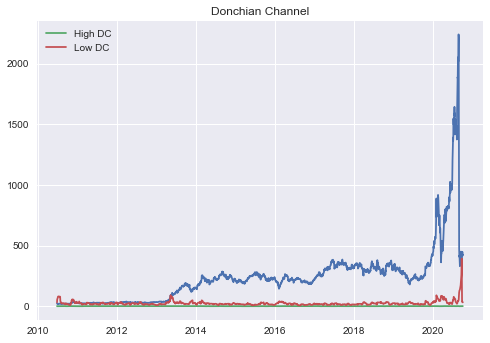

In [66]:
plt.plot(df[0: 3000].close)
plt.plot(df[0: 3000].volatility_dch, label='High DC')
plt.plot(df[0: 3000].volatility_dcl, label='Low DC')
plt.title('Donchian Channel')
plt.legend()
plt.show()


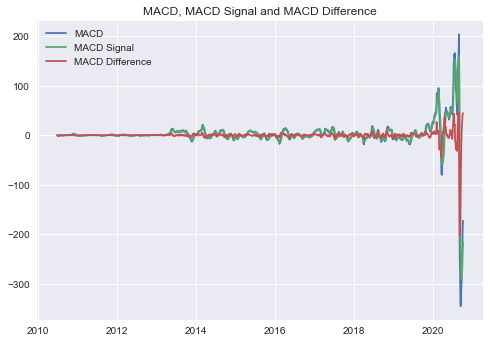

In [67]:
plt.plot(df[0:3000].trend_macd, label='MACD')
plt.plot(df[0:3000].trend_macd_signal, label='MACD Signal')
plt.plot(df[0:3000].trend_macd_diff, label='MACD Difference')
plt.title('MACD, MACD Signal and MACD Difference')
plt.legend()
plt.show()

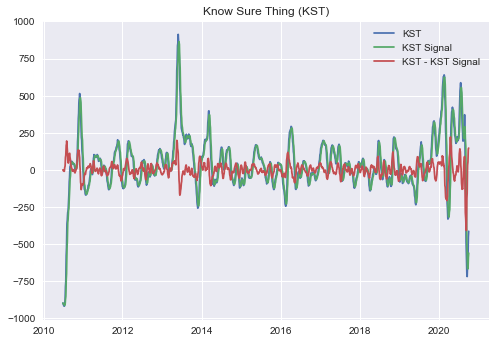

In [68]:
plt.plot(df[0:3000].trend_kst, label='KST')
plt.plot(df[0:3000].trend_kst_sig, label='KST Signal')
plt.plot(df[0:3000].trend_kst_diff, label='KST - KST Signal')
plt.title('Know Sure Thing (KST)')
plt.legend()
plt.show()


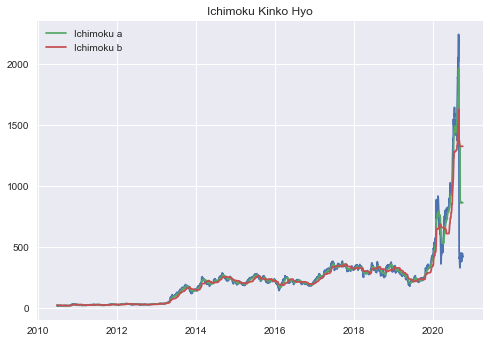

In [69]:
plt.plot(df[0:3000].close)
plt.plot(df[0:3000].trend_ichimoku_a, label='Ichimoku a')
plt.plot(df[0:3000].trend_ichimoku_b, label='Ichimoku b')
plt.title('Ichimoku Kinko Hyo')
plt.legend()
plt.show()

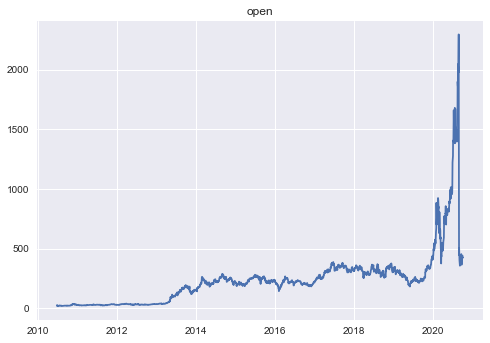

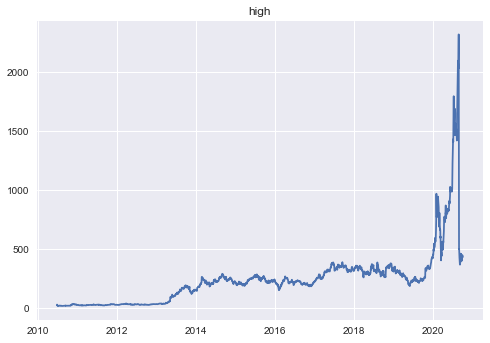

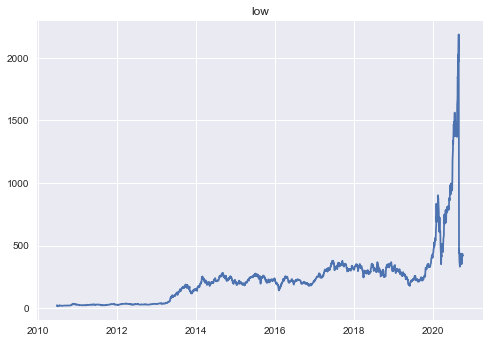

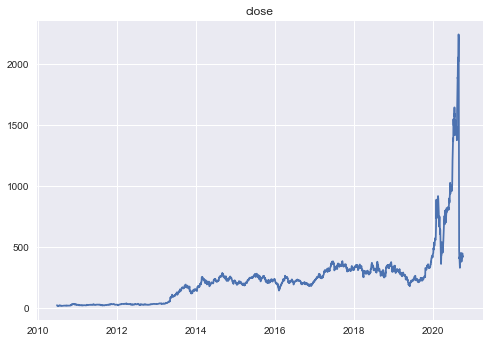

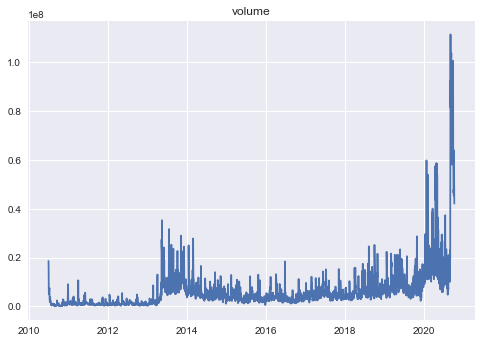

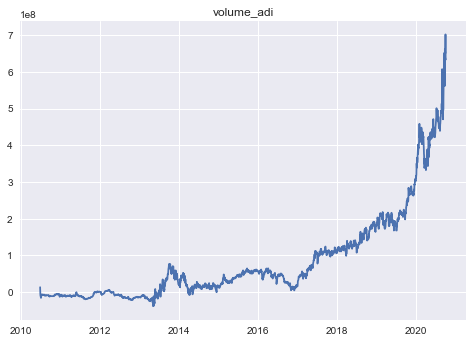

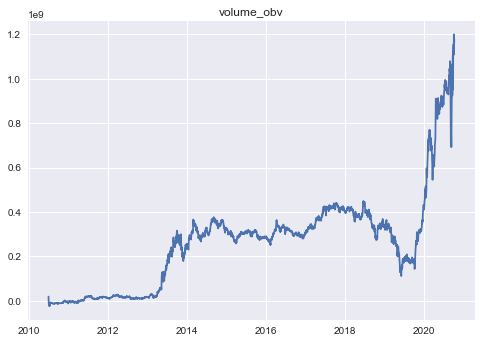

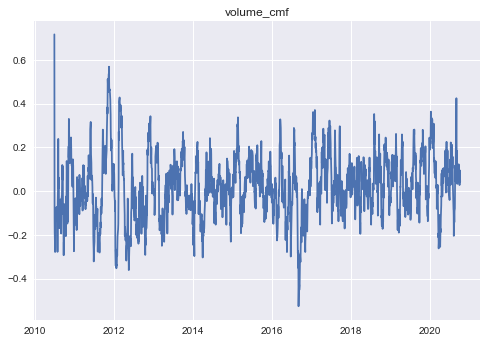

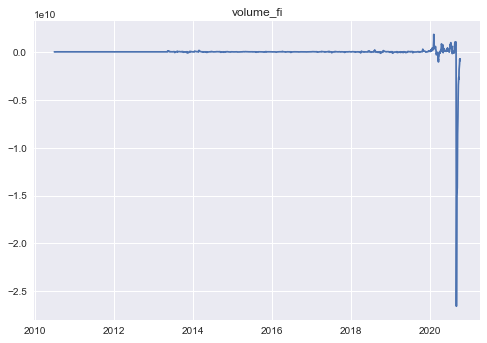

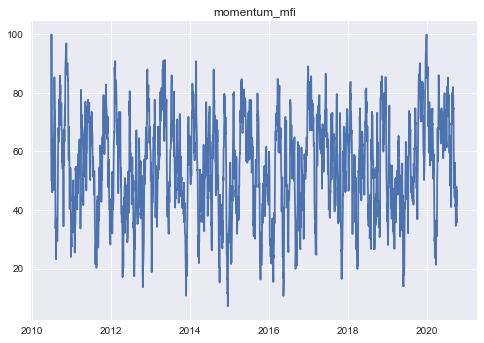

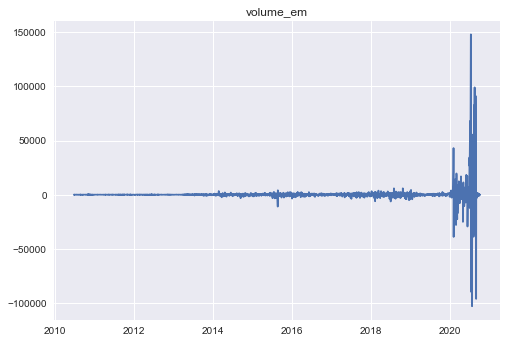

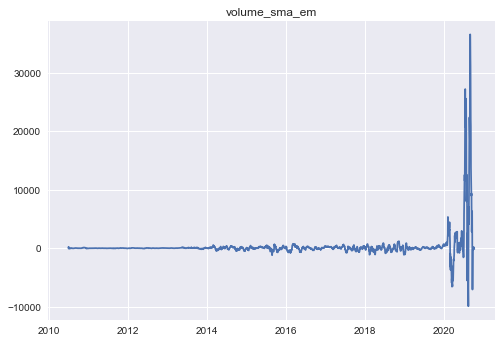

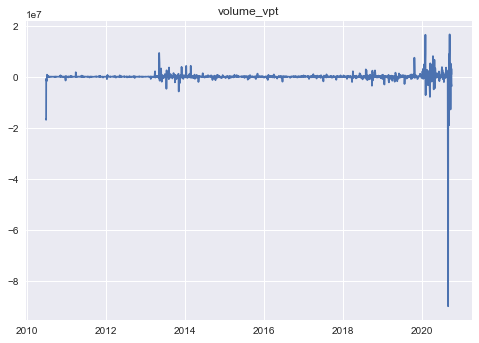

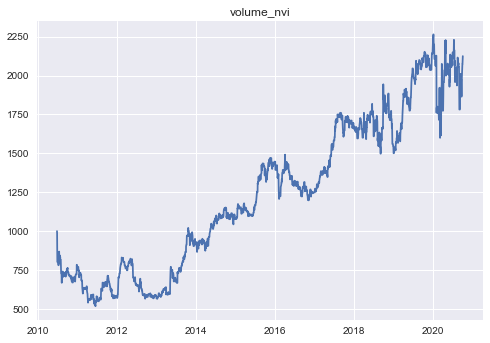

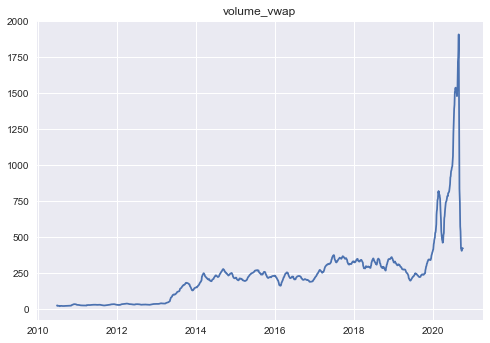

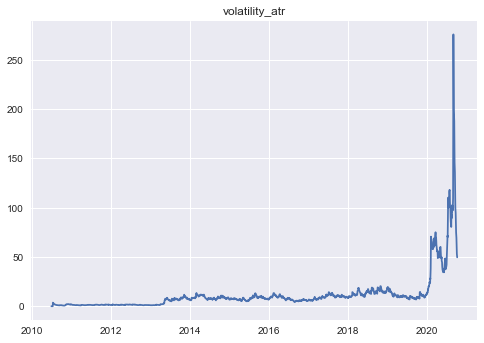

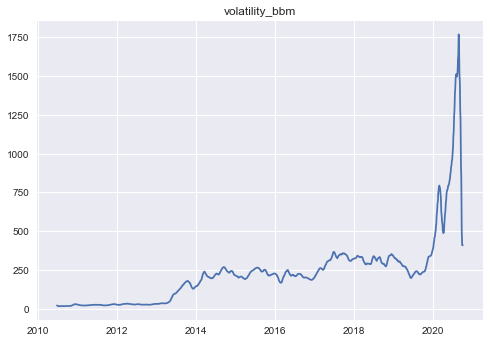

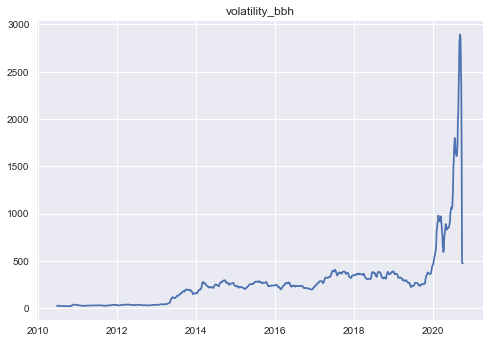

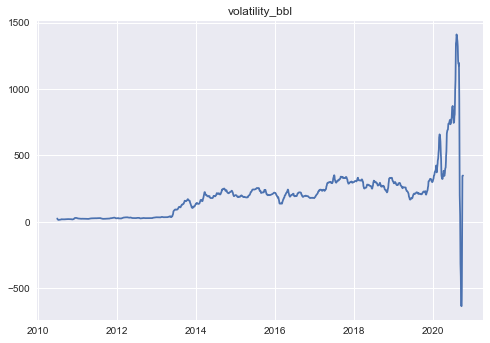

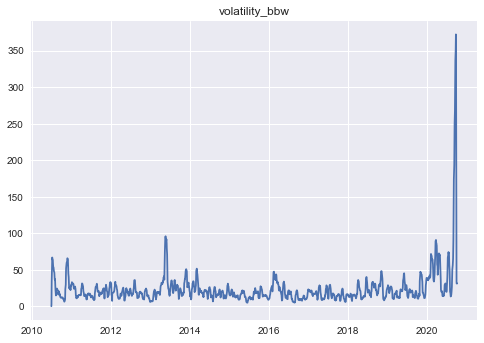

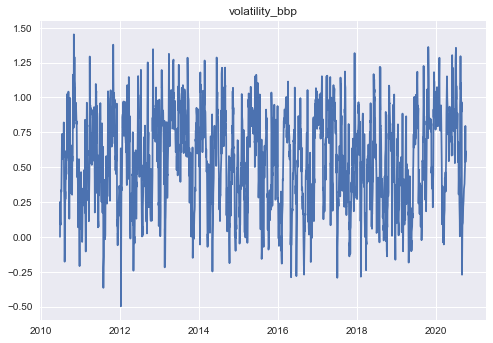

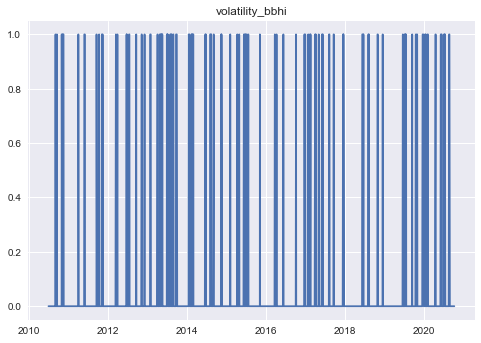

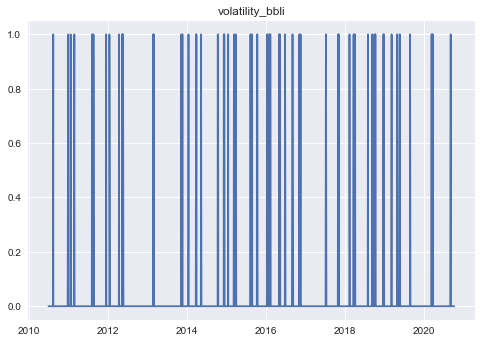

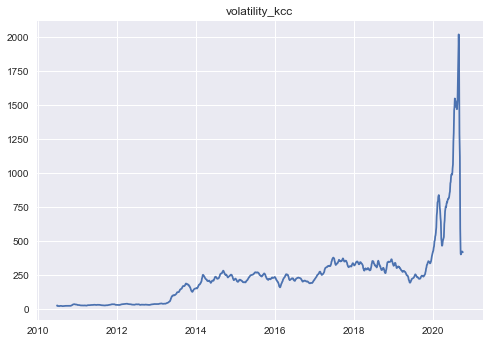

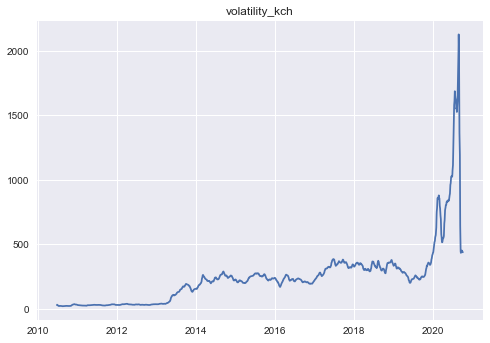

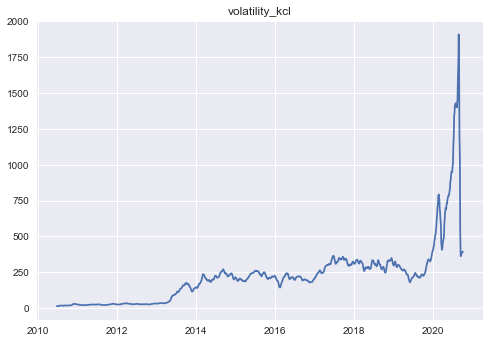

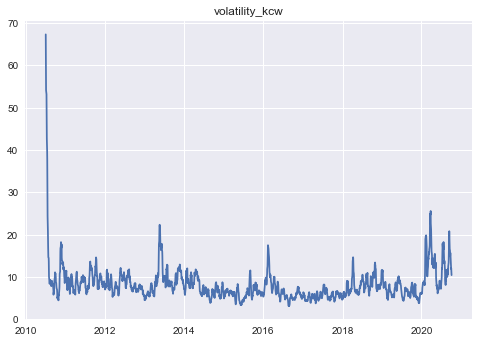

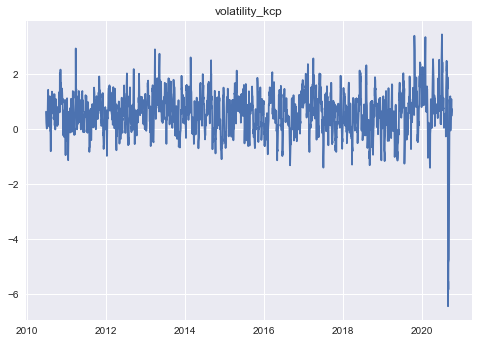

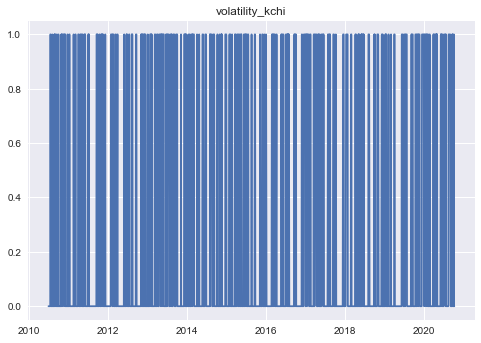

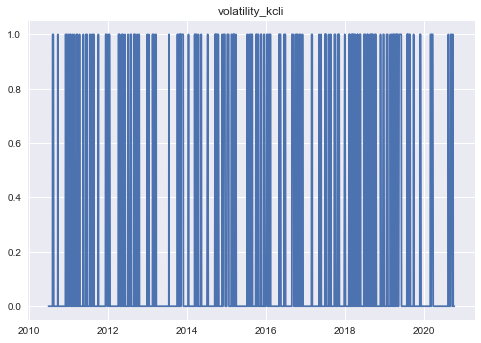

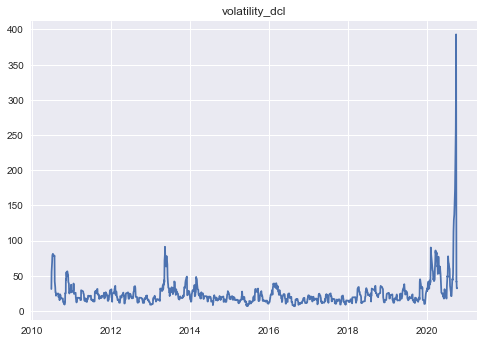

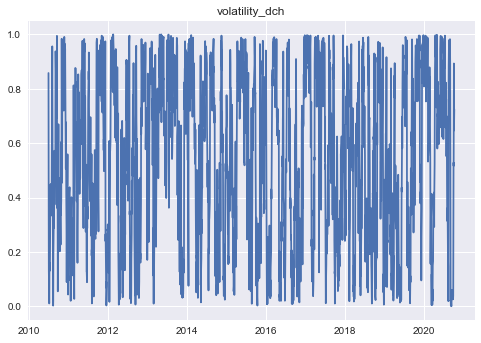

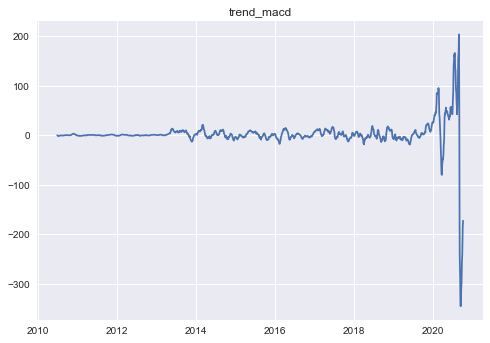

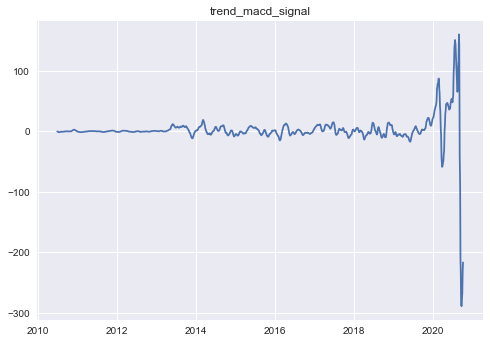

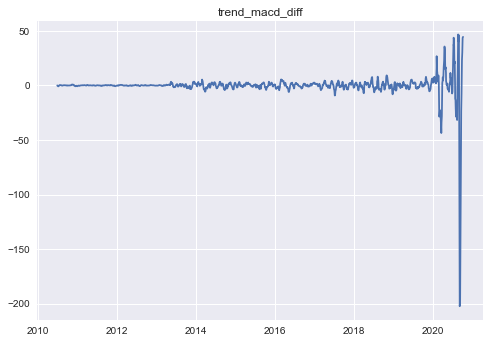

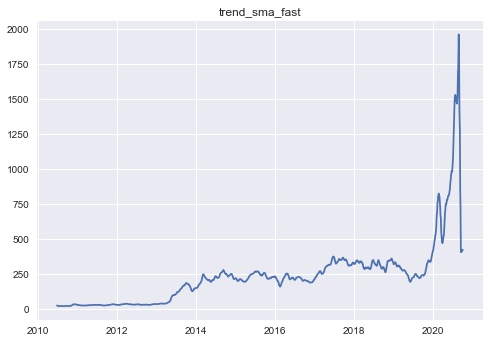

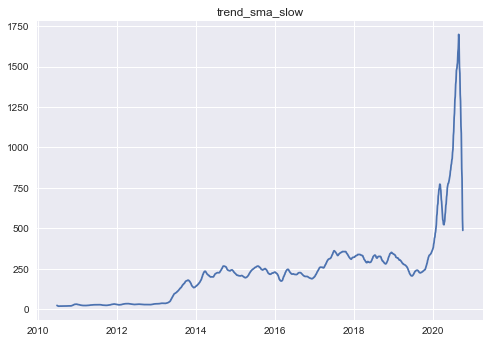

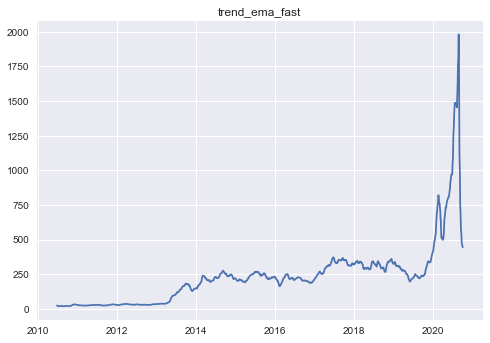

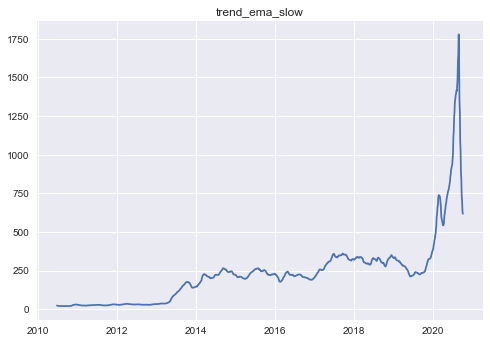

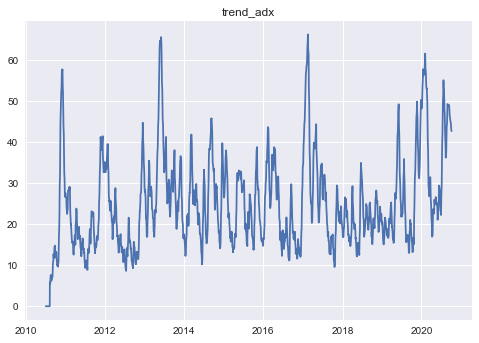

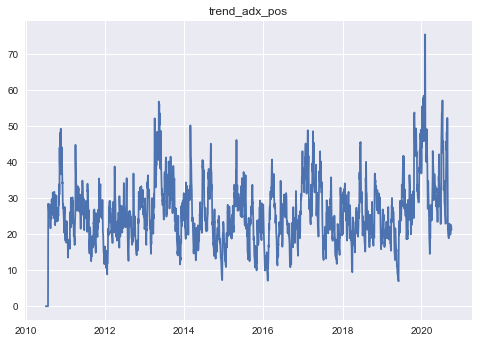

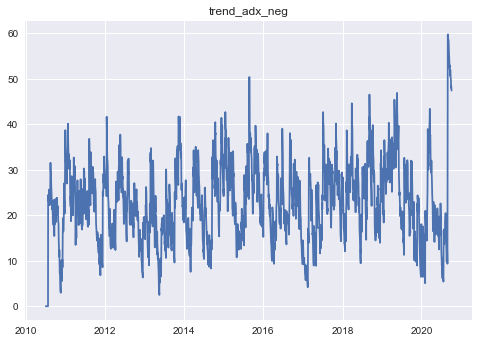

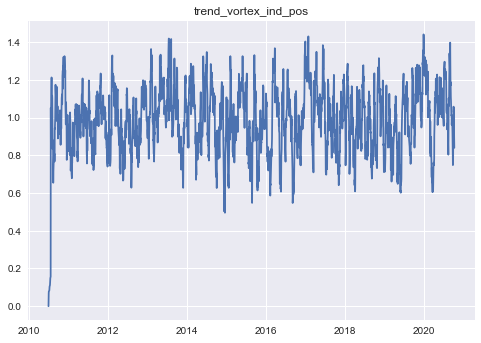

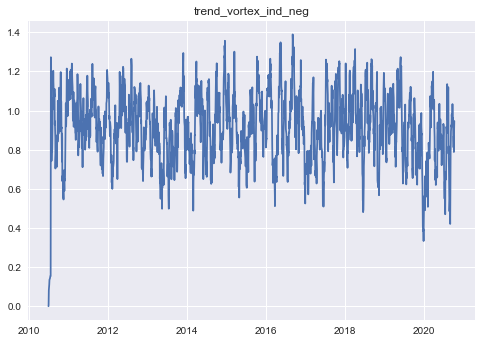

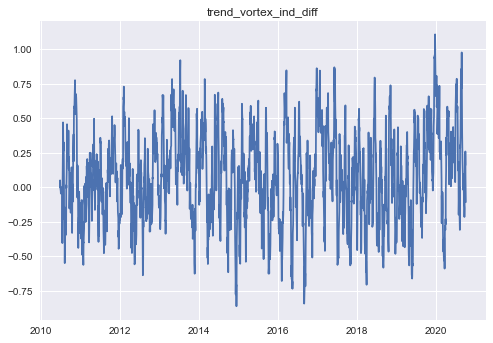

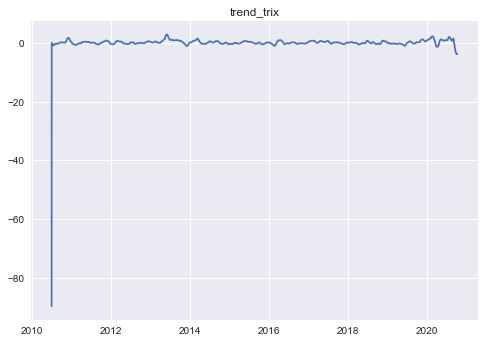

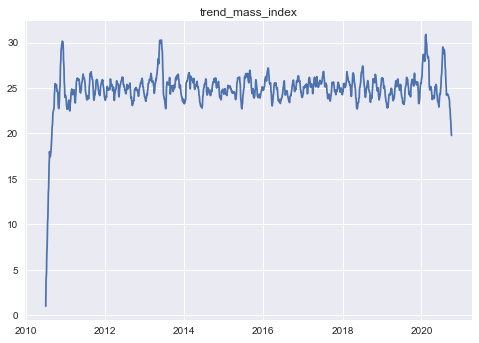

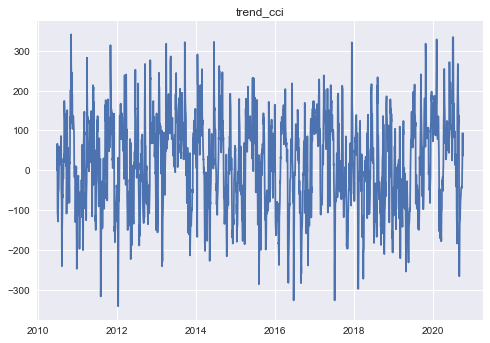

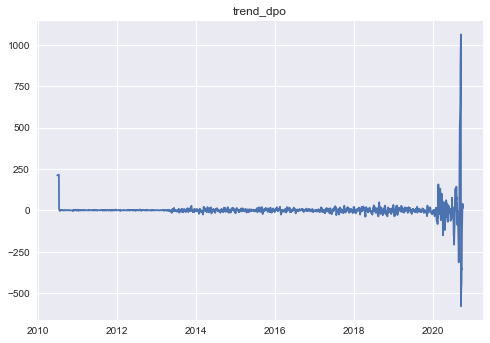

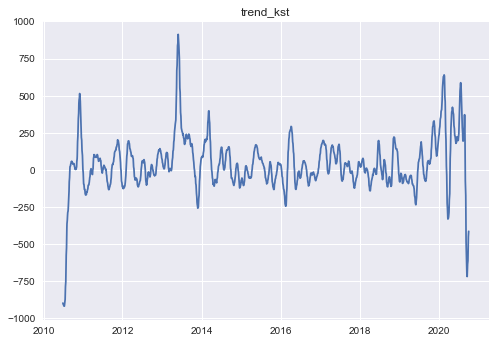

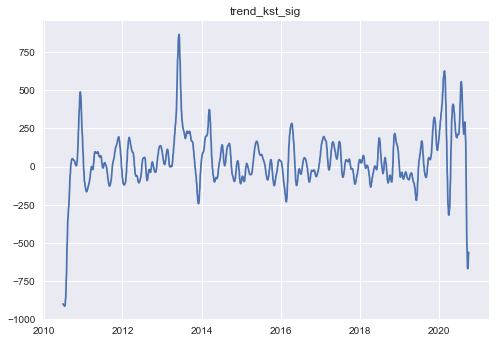

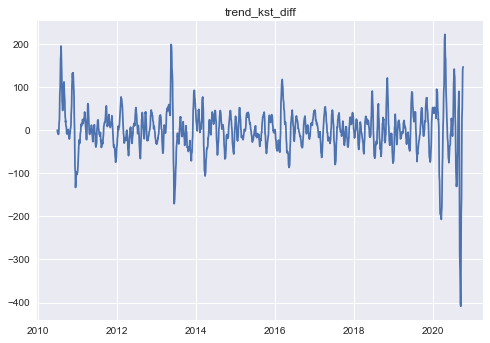

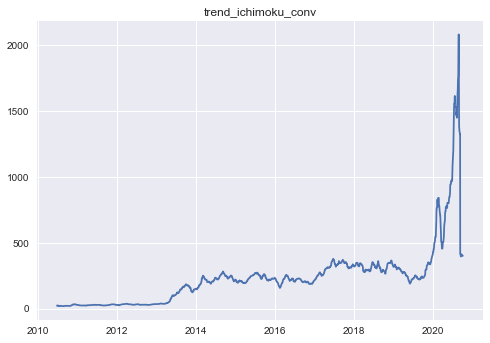

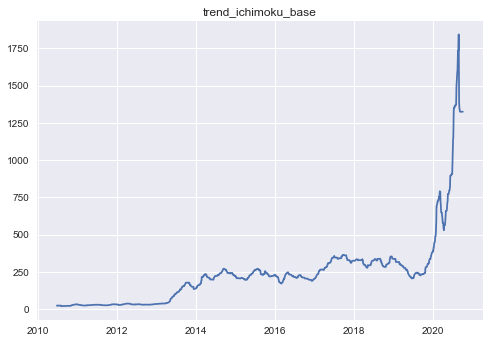

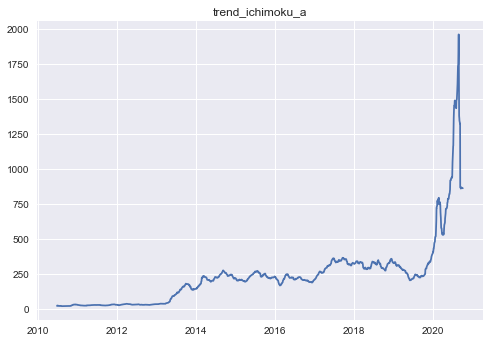

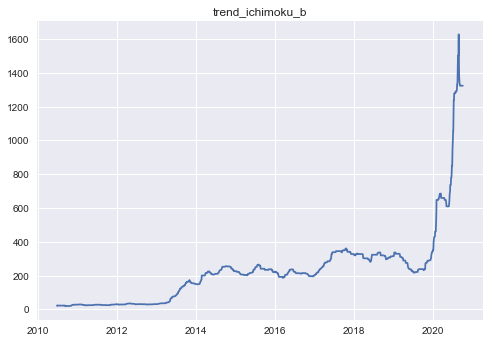

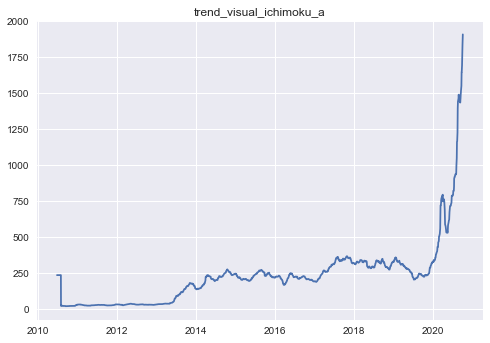

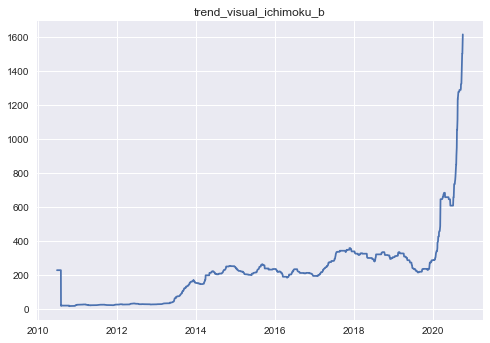

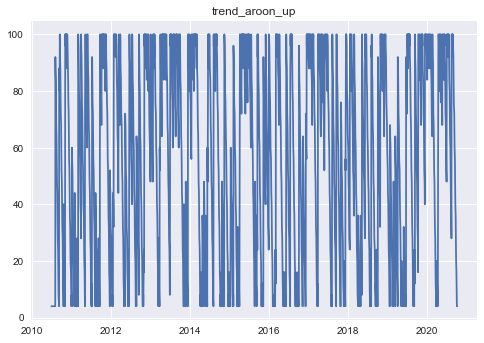

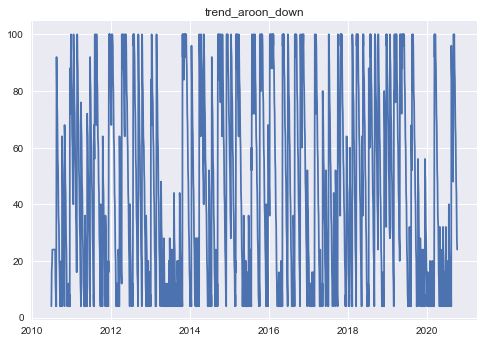

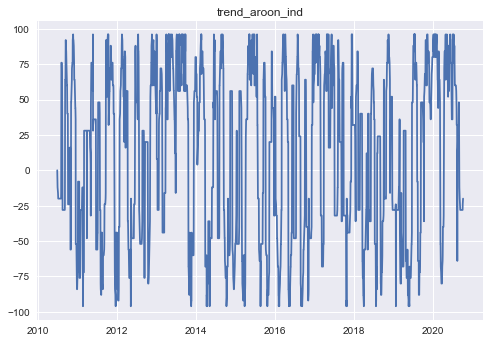

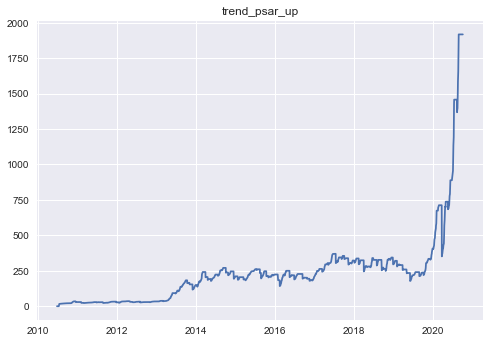

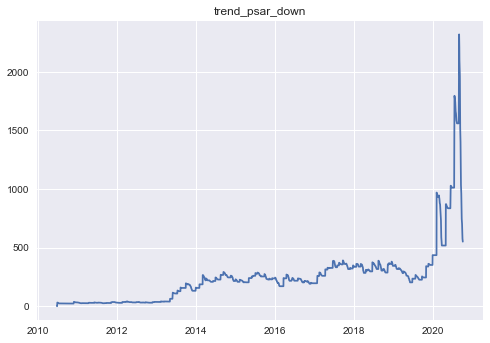

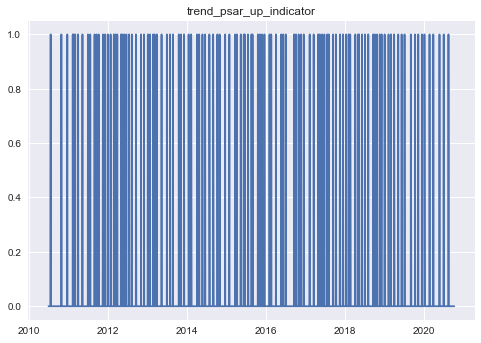

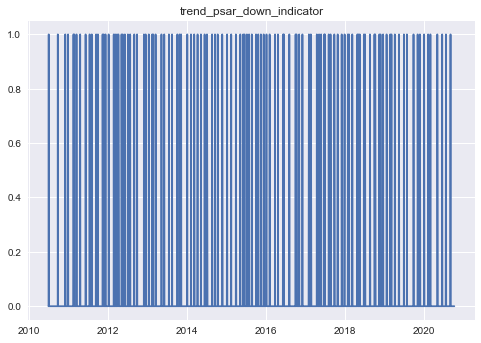

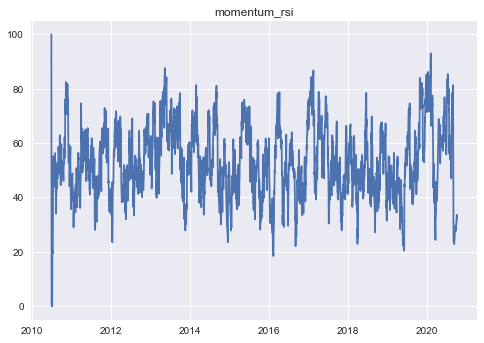

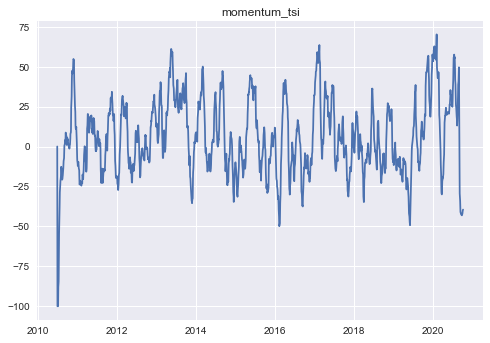

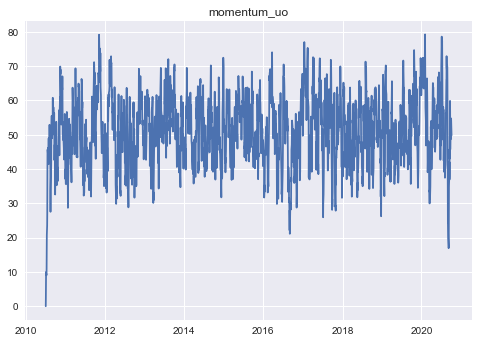

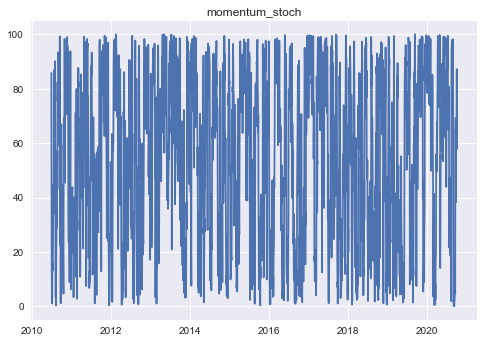

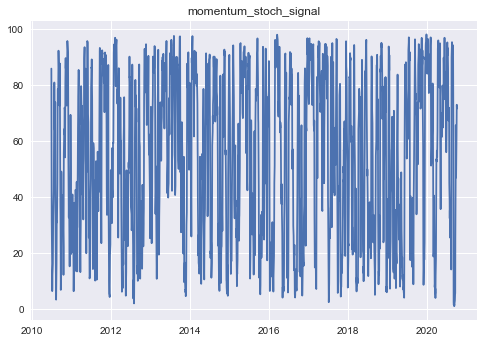

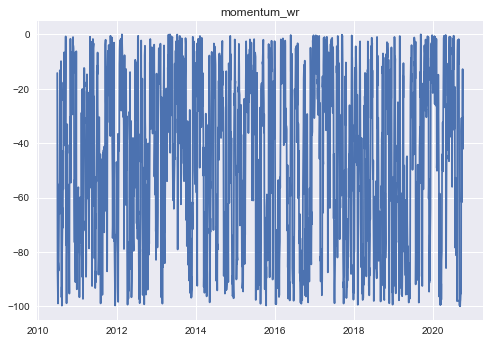

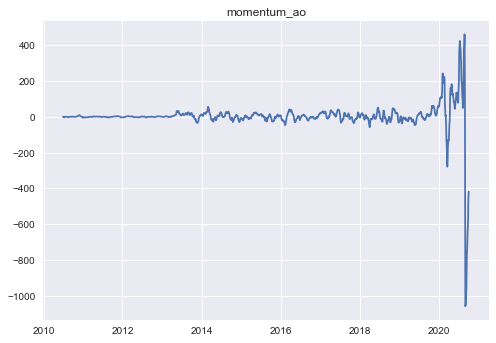

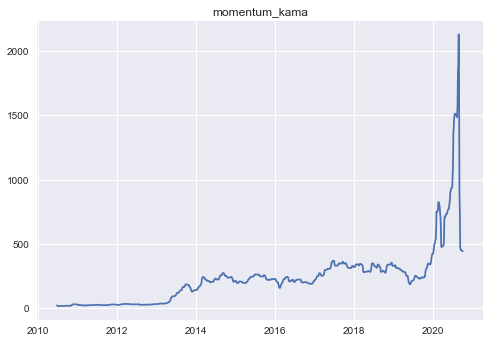

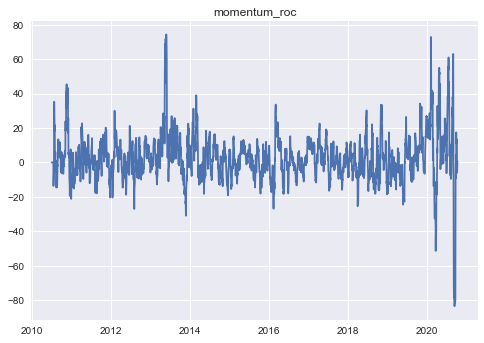

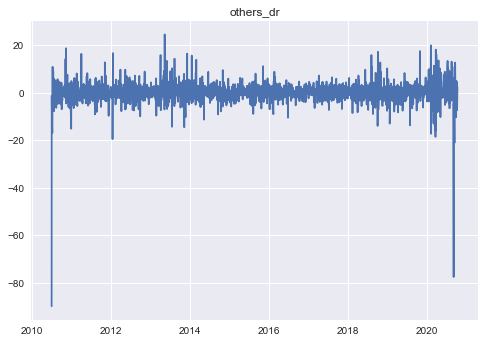

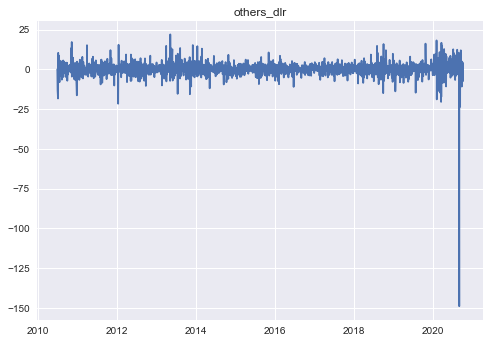

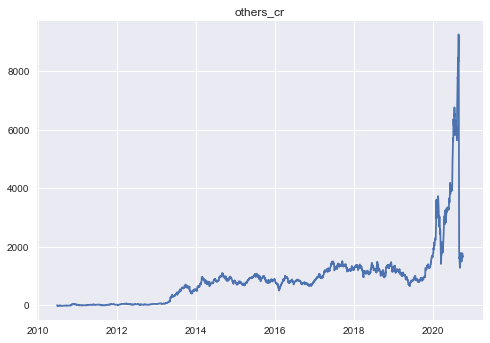

In [70]:
for col in df.columns:
    plt.plot(df[col])
    plt.title(col)
    plt.show()